In [ ]:
import pandas as pd
import nltk
import numpy as np
import re

#load inthe NTLK stopwords to remove articles, preposition and other words that are not actionable
from nltk.corpus import stopwords
# This allows to create individual objects from a bog of words
from nltk.tokenize import word_tokenize, sent_tokenize
# Lemmatizer helps to reduce words to the base form
from nltk.stem import WordNetLemmatizer

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)discount
import os
os.chdir('/content/gdrive/My Drive/Deep Learning/Code')

import pandas as pd
import numpy as np
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')


import pandas as pd
import numpy as np
df_pickle = pd.read_pickle('Final_processed.pkl')

Mounted at /content/gdrive


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df=pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv')

In [ ]:
df['image_pixel'] = df_pickle['image_pixel']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [ ]:
high_sale = [1 if units_sold > 300 else 0 for units_sold in df["units_sold"]]
df['high_sale'] = high_sale

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

<ipython-input-8-8025e9c6e938>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='high_sale', palette=['blue', 'orange'])


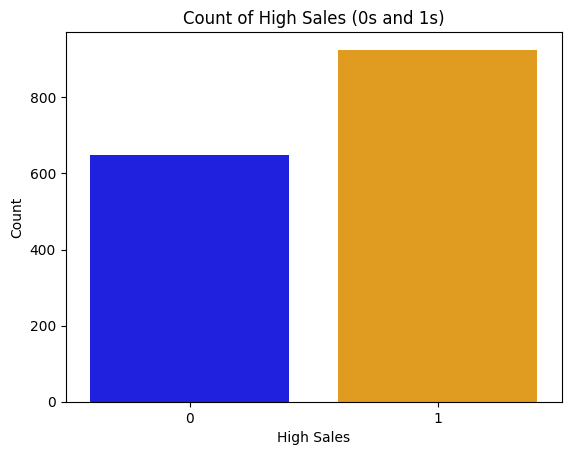

In [ ]:
# Plotting with Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='high_sale', palette=['blue', 'orange'])
plt.xlabel('High Sales')
plt.ylabel('Count')
plt.title('Count of High Sales (0s and 1s)')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import resample

def balance_dataset(df, image_column='image_pixel'):

    # Separate data with and without images
    df_with_images = df[df[image_column].notna()]
    df_without_images = df[df[image_column].isna()]

    # Balance data with images
    if len(df_with_images) > 0:
        # Process images where available
        X_images = np.stack(df_with_images[image_column].values)
        y_images = df_with_images['high_sale'].values

        # Balance images using augmentation
        X_images_balanced, y_images_balanced = augment_minority(X_images, y_images)

        # Create temporary dataframe without image column for rows with images
        df_with_images_temp = df_with_images.drop(columns=[image_column])

        # Separate majority and minority classes for rows with images
        df_maj_with_img = df_with_images_temp[df_with_images_temp['high_sale'] == 1]
        df_min_with_img = df_with_images_temp[df_with_images_temp['high_sale'] == 0]

        # Upsample minority class
        if len(df_maj_with_img) > len(df_min_with_img):
            df_min_upsampled = resample(df_min_with_img,
                                      replace=True,
                                      n_samples=len(df_maj_with_img),
                                      random_state=42)
            df_with_images_balanced = pd.concat([df_maj_with_img, df_min_upsampled])
        else:
            df_maj_upsampled = resample(df_maj_with_img,
                                      replace=True,
                                      n_samples=len(df_min_with_img),
                                      random_state=42)
            df_with_images_balanced = pd.concat([df_maj_upsampled, df_min_with_img])

        # Add balanced image data
        df_with_images_balanced[image_column] = [img for img in X_images_balanced]
    else:
        df_with_images_balanced = pd.DataFrame(columns=df.columns)

    # Balance data without images separately
    if len(df_without_images) > 0:
        # Separate majority and minority classes for rows without images
        df_maj_no_img = df_without_images[df_without_images['high_sale'] == 1]
        df_min_no_img = df_without_images[df_without_images['high_sale'] == 0]

        # Upsample minority class
        if len(df_maj_no_img) > len(df_min_no_img):
            df_min_no_img_upsampled = resample(df_min_no_img,
                                             replace=True,
                                             n_samples=len(df_maj_no_img),
                                             random_state=42)
            df_without_images_balanced = pd.concat([df_maj_no_img, df_min_no_img_upsampled])
        else:
            df_maj_no_img_upsampled = resample(df_maj_no_img,
                                             replace=True,
                                             n_samples=len(df_min_no_img),
                                             random_state=42)
            df_without_images_balanced = pd.concat([df_maj_no_img_upsampled, df_min_no_img])
    else:
        df_without_images_balanced = pd.DataFrame(columns=df.columns)

    # Combine balanced datasets with and without images
    df_final = pd.concat([df_with_images_balanced, df_without_images_balanced])

    # Shuffle the dataset
    df_final = df_final.sample(frac=1, random_state=42).reset_index(drop=True)

    return df_final

def augment_minority(X, y):
    """
    Oversample minority class using image augmentation
    """
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Find minority class
    minority_class = 0 if np.sum(y == 0) < np.sum(y == 1) else 1
    majority_class = 1 - minority_class

    # Get minority samples
    X_minority = X[y == minority_class]
    y_minority = y[y == minority_class]

    # Calculate samples needed
    n_minority = len(X_minority)
    n_majority = np.sum(y == majority_class)
    n_to_generate = n_majority - n_minority

    # Generate augmented images
    X_augmented = []
    for i in range(n_to_generate):
        idx = i % n_minority
        img = X_minority[idx:idx+1]
        augmented = next(datagen.flow(img, batch_size=1))[0]
        X_augmented.append(augmented)

    # Combine original and augmented data
    X_balanced = np.concatenate([X, np.array(X_augmented)])
    y_balanced = np.concatenate([y, np.full(n_to_generate, minority_class)])

    return X_balanced, y_balanced

# Usage example
print("Original dataset distribution:")
print("Total samples:", len(df))
print("Samples with images:", df['image_pixel'].notna().sum())
print("Samples without images:", df['image_pixel'].isna().sum())
print("Class distribution:", df['high_sale'].value_counts())

# Balance the dataset
df_balanced = balance_dataset(df)

print("\nBalanced dataset distribution:")
print("Total samples:", len(df_balanced))
print("Samples with images:", df_balanced['image_pixel'].notna().sum())
print("Samples without images:", df_balanced['image_pixel'].isna().sum())
print("Class distribution:", df_balanced['high_sale'].value_counts())

Original dataset distribution:
Total samples: 1573
Samples with images: 1338
Samples without images: 235
Class distribution: high_sale
1    925
0    648
Name: count, dtype: int64

Balanced dataset distribution:
Total samples: 1850
Samples with images: 1564
Samples without images: 286
Class distribution: high_sale
1    925
0    925
Name: count, dtype: int64


<ipython-input-10-90206697b221>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_balanced, x='high_sale', palette=['blue', 'orange'])


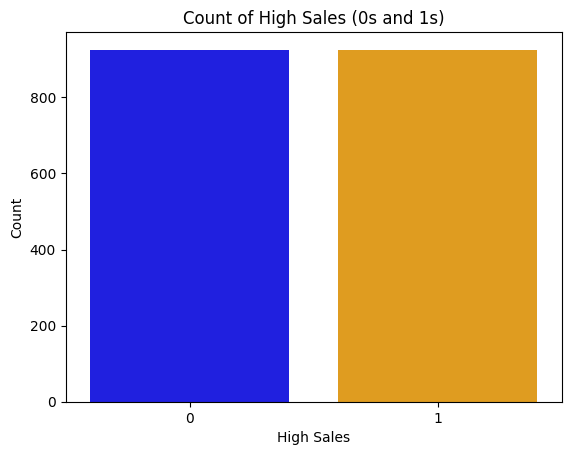

In [ ]:
sns.countplot(data=df_balanced, x='high_sale', palette=['blue', 'orange'])
plt.xlabel('High Sales')
plt.ylabel('Count')
plt.title('Count of High Sales (0s and 1s)')
plt.show()

In [ ]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1850 non-null   object 
 1   title_orig                    1850 non-null   object 
 2   price                         1850 non-null   float64
 3   retail_price                  1850 non-null   int64  
 4   currency_buyer                1850 non-null   object 
 5   units_sold                    1850 non-null   int64  
 6   uses_ad_boosts                1850 non-null   int64  
 7   rating                        1850 non-null   float64
 8   rating_count                  1850 non-null   int64  
 9   rating_five_count             1789 non-null   float64
 10  rating_four_count             1789 non-null   float64
 11  rating_three_count            1789 non-null   float64
 12  rating_two_count              1789 non-null   float64
 13  rat

In [ ]:
# product color
def main_color(s):
    main_color = {"red":"red", "white":"white", "pink":"pink", "yellow":"yellow", "green":"green", "blue":"blue", "wine":"red", "burgundy":"red", "black":"black", "navy":"navy", "orange":"orange",
    "rose":"pink", "gray":"gray", "grey":"gray", "purple":"purple", "violet":"purple", "army":"green", "leopard":"orange", "ivory":"white",
    "brown":"brown", "coffee":"brown", "camel":"beige", "tan":"brown", "nude":"beige", "khaki":"khaki", "apricot":"yellow", "camouflage":"green", "jasper":"red"}  # ordered by importance
    for key, value in main_color.items():
        if key in s:
            return value
    return "others"
product_color = df_balanced["product_color"]
product_color = [x.lower() if type(x) is str else 'nan' for x in product_color]
product_color = [main_color(color) for color in product_color]
from matplotlib import colors
rgb = []
for s in product_color:
  if s != "others":
    rgb.append(np.array(colors.to_rgb(s)))
rgb = np.array(rgb)
avg_rgb = np.average(rgb, axis=0)
product_colors = [avg_rgb if s == "others" else np.array(colors.to_rgb(s)) for s in product_color]
df_balanced['product_color_rgb'] = product_colors

# log prices
df_balanced['log_price'] = [np.log(p) for p in df_balanced["price"]]
df_balanced['log_retail_price'] = [np.log(p) for p in df_balanced["retail_price"]]

# log merchant rating count
df_balanced['log_merchant_rating_count'] = np.log(df_balanced['merchant_rating_count'])

# urgent text
df_balanced['urgent'] = [1 if s == "Quantité limitée !" else 0 for s in df_balanced["urgency_text"]]
df_balanced["discount_ratio"] = [df_balanced["price"][i]/df_balanced["retail_price"][i] for i in range(len(df_balanced["price"]))]

df_balanced.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,theme,crawl_month,high_sale,image_pixel,product_color_rgb,log_price,log_retail_price,log_merchant_rating_count,urgent,discount_ratio
0,Women Fashion Casual Summer Sleeveless Blackle...,Women Fashion Casual Summer Sleeveless Blackle...,8.0,48,EUR,1000,0,4.34,794,500.0,...,summer,2020-08,1,"[[[211.0, 211.0, 211.0], [211.0, 211.0, 211.0]...","[0.0, 0.0, 1.0]",2.079442,3.871201,8.132413,0,0.166667
1,S-5XL Plus La Taille D'été De Mode Femmes Sans...,S-5XL Plus Size Summer Fashion Women Sleeveles...,8.0,252,EUR,1000,1,3.88,161,79.0,...,summer,2020-08,1,NaN,"[0.0, 0.0, 0.0]",2.079442,5.529429,9.601030,0,0.031746
2,Nouvelle femme d'été pour femmes Camisole exte...,Woman's New Summer Women Stretchy Camisole Sp...,12.0,11,EUR,1000,0,3.82,428,189.0,...,summer,2020-08,1,"[[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]...","[1.0, 0.0, 0.0]",2.484907,2.397895,9.843260,1,1.090909
3,Femmes Mode d'été Leggings Pantalon court Shor...,Women Summer Fashion Leggings Short Pants Casu...,7.0,6,EUR,100,0,3.69,71,31.0,...,summer,2020-08,0,"[[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]...","[0.0, 0.0, 1.0]",1.945910,1.791759,9.403767,0,1.166667
4,Femmes Crop Tops Deep V Neck Sans manches Slim...,Women Crop Tops Deep V Neck Sleeveless Slim Fi...,9.0,34,EUR,50,0,5.00,0,NaN,...,summer,2020-08,0,"[[[210.0, 211.0, 216.0], [210.0, 210.0, 215.0]...","[1.0, 1.0, 1.0]",2.197225,3.526361,9.593969,0,0.264706


In [ ]:
rgb = df_balanced["product_color_rgb"]
rgb = np.stack(rgb.values, axis=0)
for i in range(3):
    df_balanced["product_color_rgb"+str(i)] = rgb[:,i]
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 54 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1850 non-null   object 
 1   title_orig                    1850 non-null   object 
 2   price                         1850 non-null   float64
 3   retail_price                  1850 non-null   int64  
 4   currency_buyer                1850 non-null   object 
 5   units_sold                    1850 non-null   int64  
 6   uses_ad_boosts                1850 non-null   int64  
 7   rating                        1850 non-null   float64
 8   rating_count                  1850 non-null   int64  
 9   rating_five_count             1789 non-null   float64
 10  rating_four_count             1789 non-null   float64
 11  rating_three_count            1789 non-null   float64
 12  rating_two_count              1789 non-null   float64
 13  rat

In [ ]:
def process_sentence(sentence):
    new_tokens = word_tokenize(sentence)
    new_tokens = [token.lower() for token in new_tokens]
    new_tokens =[token for token in new_tokens if token not in stopwords.words('english')]
    new_tokens = [token for token in new_tokens if token.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(token) for token in new_tokens]
    return "".join(new_tokens)

In [ ]:
titles = df_balanced['title_orig'].tolist()
tokens = [process_sentence(t) for t in titles]
df_balanced['title_preprocessed'] = tokens
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1850 non-null   object 
 1   title_orig                    1850 non-null   object 
 2   price                         1850 non-null   float64
 3   retail_price                  1850 non-null   int64  
 4   currency_buyer                1850 non-null   object 
 5   units_sold                    1850 non-null   int64  
 6   uses_ad_boosts                1850 non-null   int64  
 7   rating                        1850 non-null   float64
 8   rating_count                  1850 non-null   int64  
 9   rating_five_count             1789 non-null   float64
 10  rating_four_count             1789 non-null   float64
 11  rating_three_count            1789 non-null   float64
 12  rating_two_count              1789 non-null   float64
 13  rat

In [ ]:
from transformers import BertTokenizer, TFBertModel
# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
import numpy as np
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Initialize BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', from_pt=True)
bert_model = TFBertModel.from_pretrained('bert-base-uncased', from_pt=True)

def encode_texts(texts, max_length=128):
    inputs = tokenizer(
        texts.tolist(),
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_tensors="tf"
    )
    return inputs

def get_bert_embeddings(encoded_inputs):
    outputs = bert_model(encoded_inputs['input_ids'],
                        attention_mask=encoded_inputs['attention_mask'])
    return outputs.last_hidden_state[:, 0, :]

def process_in_batches(df, batch_size=32):
    """Process text data in batches to avoid memory issues"""
    all_embeddings = []

    # Calculate number of batches
    n_samples = len(df_balanced)
    n_batches = (n_samples + batch_size - 1) // batch_size

    for i in range(n_batches):
        start_idx = i * batch_size
        end_idx = min((i + 1) * batch_size, n_samples)

        # Get batch of texts
        batch_texts = df_balanced['title_preprocessed'].iloc[start_idx:end_idx]

        # Process batch
        batch_encodings = encode_texts(batch_texts)
        batch_embeddings = get_bert_embeddings(batch_encodings)

        # Convert to numpy and store
        all_embeddings.append(batch_embeddings.numpy())

        # Optional: Print progress
        print(f"Processed batch {i+1}/{n_batches}", end='\r')

    # Combine all batches
    final_embeddings = np.vstack(all_embeddings)
    print("\nProcessing complete!")
    return final_embeddings

# Process data in batches
bert_embeddings_np = process_in_batches(df_balanced, batch_size=32)

print("BERT embeddings shape:", bert_embeddings_np.shape)

# Add embeddings as features
for i in range(bert_embeddings_np.shape[1]):
    df_balanced[f'bert_feature_{i}'] = bert_embeddings_np[:, i]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already

Processed batch 58/58
Processing complete!
BERT embeddings shape: (1850, 768)


In [ ]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Columns: 823 entries, title to bert_feature_767
dtypes: float32(768), float64(16), int64(17), object(22)
memory usage: 6.2+ MB


In [ ]:
X = df_balanced[["log_price", "log_retail_price", "uses_ad_boosts", "badges_count", "badge_local_product","badge_product_quality", "badge_fast_shipping", "urgent", "discount_ratio",
                    "product_color_rgb0", "product_color_rgb1", "product_color_rgb2", "shipping_option_price", "shipping_is_express", "countries_shipped_to", "inventory_total", "image_pixel"]]
y = df_balanced['high_sale']

In [ ]:
# Loop over column names and assign them to X
for i in range(768):  # Since there are 768 BERT features
    X[f'bert_feature_{i}'] = df_balanced[f'bert_feature_{i}']

In [ ]:
X.shape

(1850, 785)

In [ ]:
y.shape

(1850,)

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB5
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from keras import Input
def create_combined_model(input_shape_image, input_shape_bert, input_shape_numeric):
    # Input layers
    image_input = Input(shape=input_shape_image, name='image_input')
    image_mask = Input(shape=(1,), name='image_mask')
    bert_input = Input(shape=(input_shape_bert,), name='bert_input')
    numeric_input = Input(shape=(input_shape_numeric,), name='numeric_input')

    # Image processing branch
    base_model = EfficientNetB5(weights='imagenet',
                               include_top=False,
                               input_shape=input_shape_image)

    for layer in base_model.layers[:int(0.7 * len(base_model.layers))]:
        layer.trainable = False

    image_x = base_model(image_input)
    image_x = GlobalAveragePooling2D()(image_x)
    image_x = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(image_x)
    image_x = BatchNormalization()(image_x)
    image_x = Dropout(0.3)(image_x)

    # Use Multiply layer instead of tf.multiply
    image_x = tf.keras.layers.Multiply()([image_x, image_mask])

    # BERT features processing
    bert_x = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(bert_input)
    bert_x = BatchNormalization()(bert_x)
    bert_x = Dropout(0.3)(bert_x)

    bert_x = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(bert_x)
    bert_x = BatchNormalization()(bert_x)
    bert_x = Dropout(0.2)(bert_x)

    # Numeric features processing
    numeric_x = BatchNormalization()(numeric_input)
    numeric_x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(numeric_x)
    numeric_x = BatchNormalization()(numeric_x)
    numeric_x = Dropout(0.2)(numeric_x)

    # Combine features
    combined = Concatenate()([image_x, bert_x, numeric_x])

    # Fusion layers
    x = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(combined)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)

    output = Dense(1, activation='sigmoid')(x)

    model = Model(
        inputs=[image_input, image_mask, bert_input, numeric_input],
        outputs=output
    )

    optimizer = Adam(learning_rate=1e-4)

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

In [ ]:
def prepare_data(df, numeric_features, bert_features):
    # Create image mask (1 where image exists, 0 where NaN)
    image_mask = (~df['image_pixel'].isna()).astype(float).values.reshape(-1, 1)

    # Prepare images
    # Fill NaN with zeros for missing images
    X_image = np.zeros((len(df), 224, 224, 3))
    for idx, img in enumerate(df['image_pixel']):
        if isinstance(img, np.ndarray):  # If image exists
            X_image[idx] = img

    # Normalize image data
    X_image = X_image / 255.0

    # Prepare other features
    X_numeric = df[numeric_features].values
    X_bert = df[bert_features].values
    y = df['high_sale'].values

    return X_image, image_mask, X_bert, X_numeric, y

In [ ]:
# Function for making predictions
def predict_with_model(model, image_data, bert_data, numeric_data):
    # Create mask based on image availability
    mask = np.array([[0 if isinstance(image_data, float) and np.isnan(image_data)
                      else 1]])

    # Prepare image data
    if isinstance(image_data, float) and np.isnan(image_data):
        image_data = np.zeros((1, 224, 224, 3))
    else:
        image_data = image_data.reshape(1, 224, 224, 3) / 255.0

    # Make prediction
    prediction = model.predict(
        [image_data, mask, bert_data.reshape(1, -1), numeric_data.reshape(1, -1)]
    )
    return prediction[0]

In [ ]:
# Rest of the code remains the same
numeric_features = ['log_price', 'log_retail_price', 'uses_ad_boosts', 'badges_count',
                   'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
                   'urgent', 'discount_ratio', 'product_color_rgb0', 'product_color_rgb1',
                   'product_color_rgb2', 'shipping_option_price', 'shipping_is_express',
                   'countries_shipped_to', 'inventory_total']
bert_features = [f'bert_feature_{i}' for i in range(768)]

# Prepare data
X_image, image_mask, X_bert, X_numeric, y = prepare_data(df_balanced, numeric_features, bert_features)

# Split data maintaining alignment
(X_image_train, X_image_test,
 mask_train, mask_test,
 X_bert_train, X_bert_test,
 X_numeric_train, X_numeric_test,
 y_train, y_test) = train_test_split(
    X_image, image_mask, X_bert, X_numeric, y,
    test_size=0.125, random_state=42
)

(X_image_train, X_image_val,
 mask_train, mask_val,
 X_bert_train, X_bert_val,
 X_numeric_train, X_numeric_val,
 y_train, y_val) = train_test_split(
    X_image_train, mask_train, X_bert_train, X_numeric_train, y_train,
    test_size=0.14286, random_state=42
)

# Create and train model
input_shape_image = X_image.shape[1:]
model = create_combined_model(
    input_shape_image=input_shape_image,
    input_shape_bert=768,
    input_shape_numeric=len(numeric_features)
)

115263384/115263384 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True,
        min_delta=0.001
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_accuracy',
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    )
]

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(enumerate(class_weights))

# Training with modified inputs
history = model.fit(
    [X_image_train, mask_train, X_bert_train, X_numeric_train],
    y_train,
    validation_data=([X_image_val, mask_val, X_bert_val, X_numeric_val], y_val),
    epochs=50,
    batch_size=32,
    callbacks=callbacks,
    class_weight=class_weight_dict,
    verbose=1
)

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 227s 3s/step - accuracy: 0.4940 - loss: 3.3506 - val_accuracy: 0.5000 - val_loss: 3.0689 - learning_rate: 1.0000e-04
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 31s 227ms/step - accuracy: 0.5446 - loss: 3.1956 - val_accuracy: 0.5647 - val_loss: 2.9980 - learning_rate: 1.0000e-04
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 222ms/step - accuracy: 0.5478 - loss: 3.1070 - val_accuracy: 0.5086 - val_loss: 2.9973 - learning_rate: 1.0000e-04
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 223ms/step - accuracy: 0.5625 - loss: 3.1387 - val_accuracy: 0.5086 - val_loss: 2.9999 - learning_rate: 1.0000e-04
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 12s 255ms/step - accuracy: 0.5736 - loss: 3.0434 - val_accuracy: 0.5172 - val_loss: 2.9592 - learning_rate: 1.0000e-04
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 19s 222ms/step - accuracy: 0.5493 - loss: 3.0099 - val_accuracy: 0.5302 - val_loss: 2.9313 - learning_rate: 1.0000e-04
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 244ms/step - accur

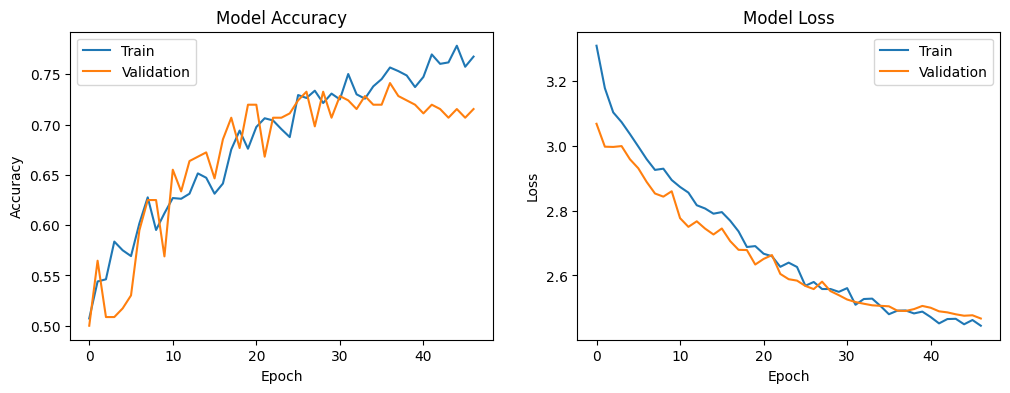

In [ ]:
# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

# Predict on the test data
y_pred_prob = model.predict([X_image_test, mask_test, X_bert_test, X_numeric_test])

# Convert probabilities to binary predictions (threshold 0.5 for sigmoid activation)
y_pred = (y_pred_prob >= 0.5).astype(int).flatten()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test data: {accuracy:.2f}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step
Accuracy on test data: 0.75
